In [7]:
import pandas as pd
import numpy as np
# Carregar dados do arquivo JSON
dados = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
# Mostrar as primeiras linhas do dataframe
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [8]:
# Padronizar e concatenar os dados obtidos

# Extrair dados aninhados das colunas JSON
customer_df = pd.json_normalize(dados['customer'])
phone_df = pd.json_normalize(dados['phone'])
internet_df = pd.json_normalize(dados['internet'])
account_df = pd.json_normalize(dados['account'])

# Concatenar todos os dataframes
dados_padronizados = pd.concat([dados[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Mostrar as primeiras linhas do dataframe combinado
display(dados_padronizados.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
# Extrair e padronizar os dados das colunas
customer_df = pd.json_normalize(dados['customer'])
# Converter 'SeniorCitizen' para 'Yes'/'No'
customer_df['SeniorCitizen'] = customer_df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
phone_df = pd.json_normalize(dados['phone'])
internet_df = pd.json_normalize(dados['internet'])
account_df = pd.json_normalize(dados['account'])
# substituir todos os '' no dataframe por NaN
customer_df = customer_df.replace('', np.nan)
phone_df = phone_df.replace('', np.nan)
internet_df = internet_df.replace('', np.nan)
account_df = account_df.replace('', np.nan)
dados['Churn'] = dados['Churn'].replace('', np.nan)


# Retirar valores nulos
customer_df.dropna(inplace=True)
phone_df.dropna(inplace=True)
internet_df.dropna(inplace=True)
account_df.dropna(inplace=True)


# Concatenar os dados
dados_padronizados = pd.concat([dados[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Mostra o dataframe de x linhas
x = 20
dados_padronizados.head(x)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,No,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,Yes,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,No,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,Yes,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,No,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [11]:
# Dicionário de dados

# customerID: número de identificação único de cada cliente
# Churn: se o cliente deixou ou não a empresa
# gender: gênero (masculino e feminino)
# SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
# Partner: se o cliente possui ou não um parceiro ou parceira
# Dependents: se o cliente possui ou não dependentes
# tenure: meses de contrato do cliente
# PhoneService: assinatura de serviço telefônico
# MultipleLines: assisnatura de mais de uma linha de telefone
# InternetService: assinatura de um provedor internet
# OnlineSecurity: assinatura adicional de segurança online
# OnlineBackup: assinatura adicional de backup online
# DeviceProtection: assinatura adicional de proteção no dispositivo
# TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
# StreamingTV: assinatura de TV a cabo
# StreamingMovies: assinatura de streaming de filmes
# Contract: tipo de contrato
# PaperlessBilling: se o cliente prefere receber online a fatura
# PaymentMethod: forma de pagamento
# Charges.Monthly: total de todos os serviços do cliente por mês
# Charges.Total: total gasto pelo cliente

--- Análise Básica de Churn ---

Taxa de churn geral: 26.54%

Porcentagem e Gráficos de Churn por Variáveis:

Análise para gender:


,Yes
gender,
Female,26.92
Male,26.16


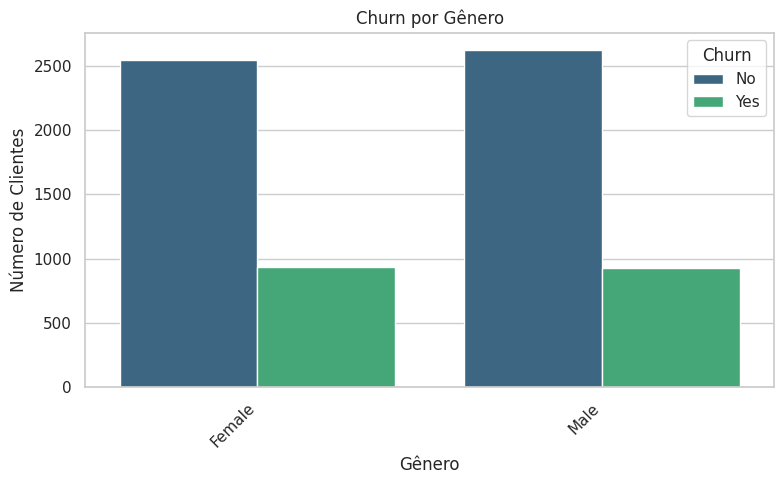


Análise para SeniorCitizen:


,Yes
SeniorCitizen,
Yes,41.68
No,23.61


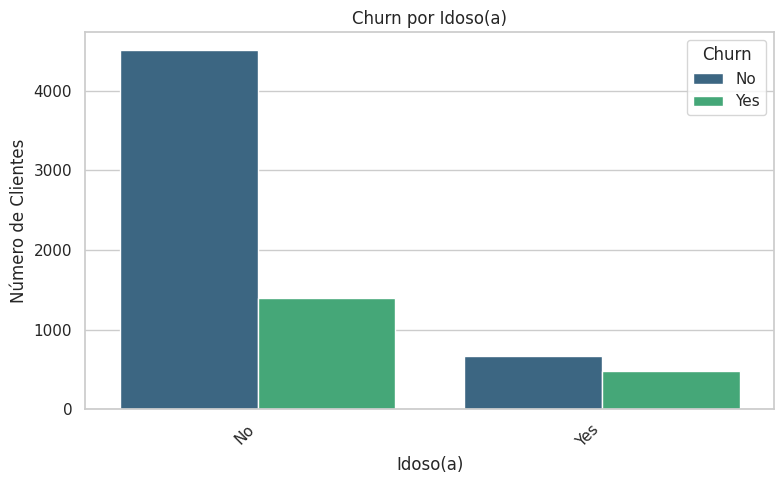


Análise para Partner:


,Yes
Partner,
No,32.96
Yes,19.66


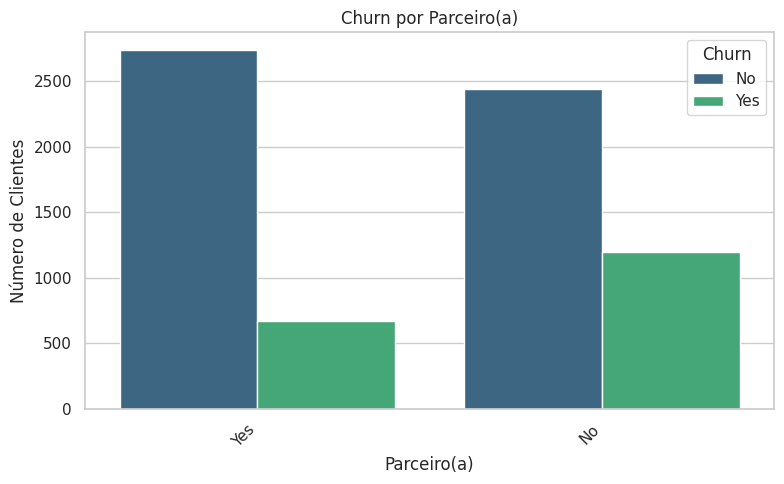


Análise para Dependents:


,Yes
Dependents,
No,31.28
Yes,15.45


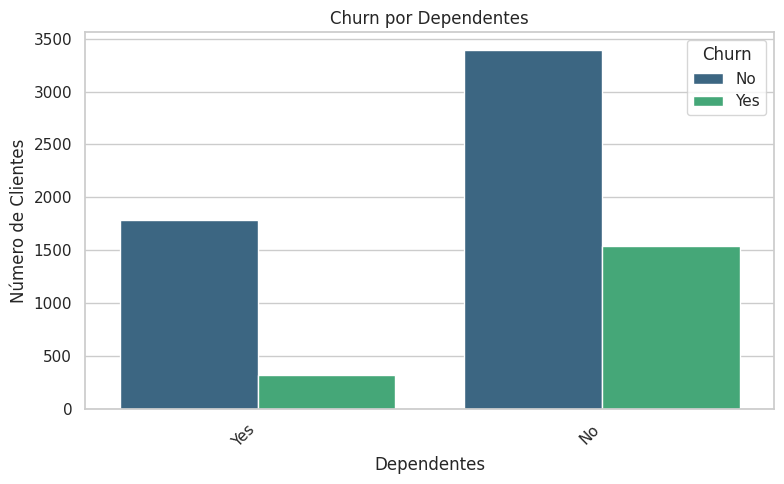


Análise para PhoneService:


,Yes
PhoneService,
Yes,26.71
No,24.93


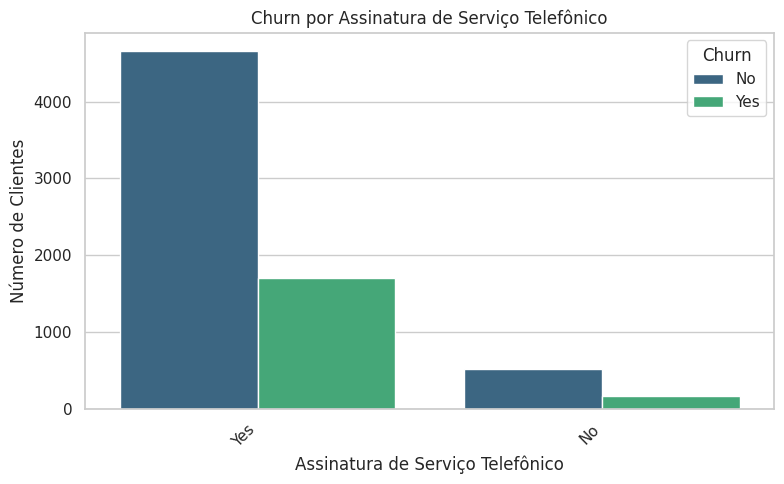


Análise para MultipleLines:


,Yes
MultipleLines,
Yes,28.61
No,25.04
No phone service,24.93


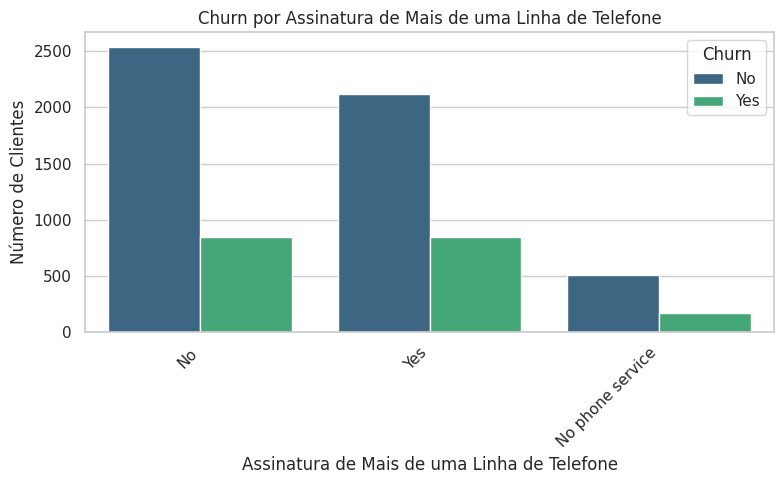


Análise para InternetService:


,Yes
InternetService,
Fiber optic,41.89
DSL,18.96
No,7.40


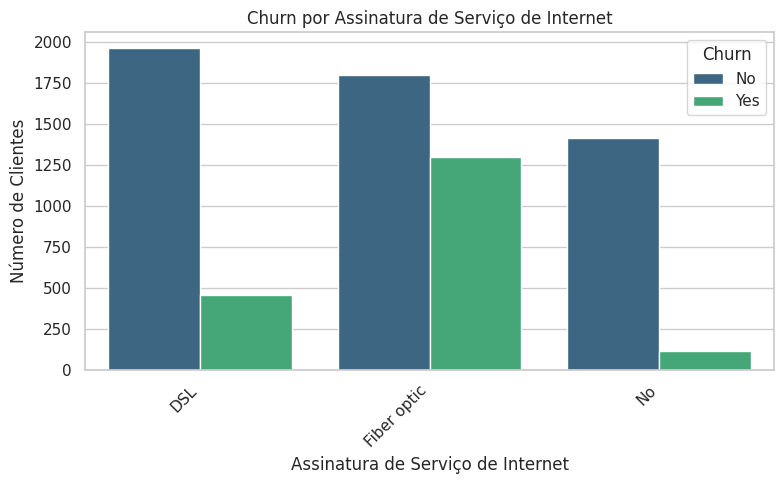


Análise para OnlineSecurity:


,Yes
OnlineSecurity,
No,41.77
Yes,14.61
No internet service,7.40


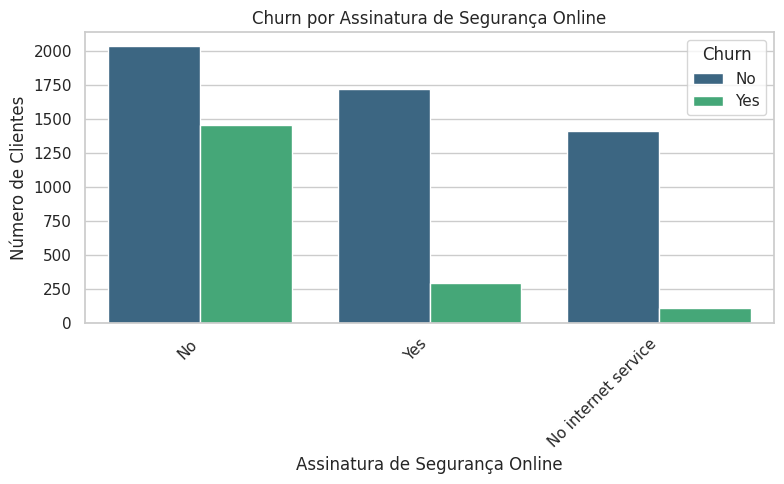


Análise para OnlineBackup:


,Yes
OnlineBackup,
No,39.93
Yes,21.53
No internet service,7.40


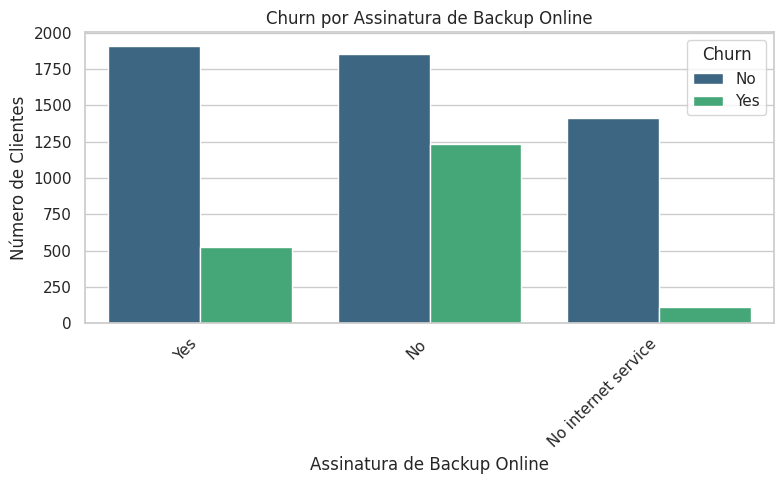


Análise para DeviceProtection:


,Yes
DeviceProtection,
No,39.13
Yes,22.50
No internet service,7.40


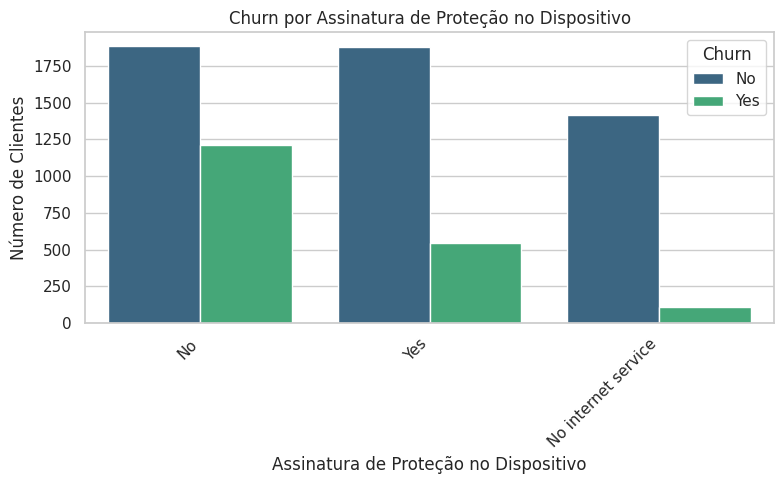


Análise para TechSupport:


,Yes
TechSupport,
No,41.64
Yes,15.17
No internet service,7.40


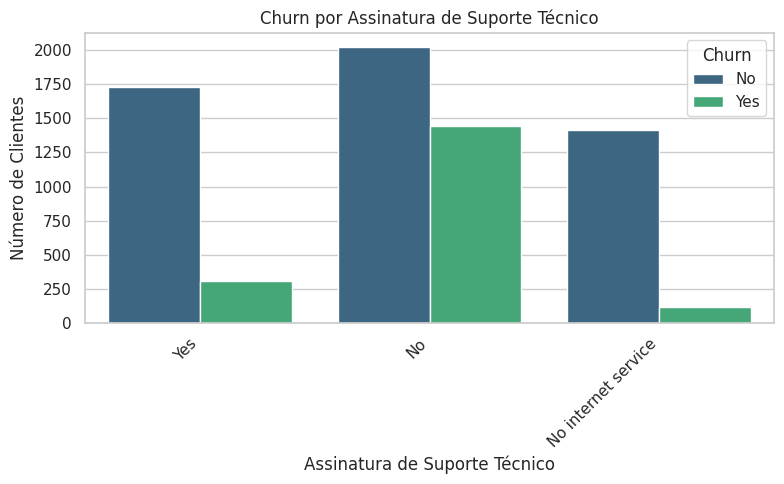


Análise para StreamingTV:


,Yes
StreamingTV,
No,33.52
Yes,30.07
No internet service,7.40


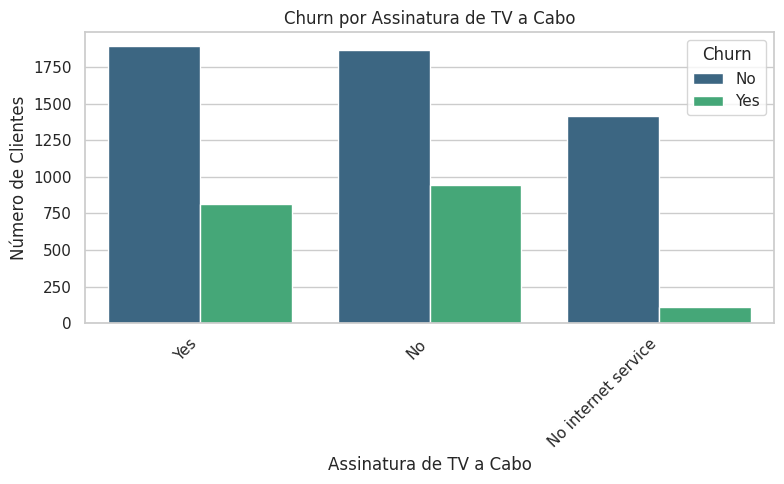


Análise para StreamingMovies:


,Yes
StreamingMovies,
No,33.68
Yes,29.94
No internet service,7.40


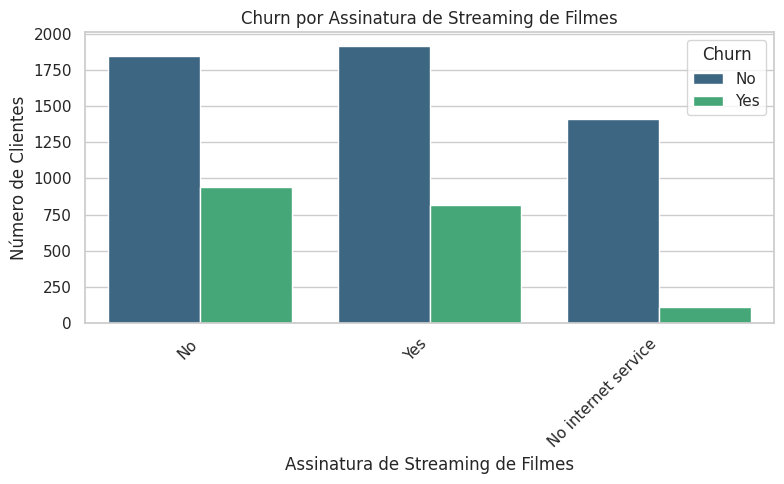


Análise para Contract:


,Yes
Contract,
Month-to-month,42.71
One year,11.27
Two year,2.83


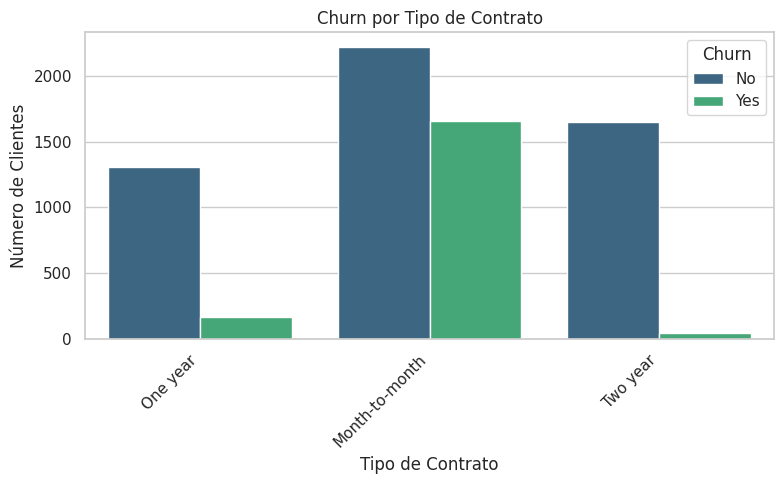


Análise para PaperlessBilling:


,Yes
PaperlessBilling,
Yes,33.57
No,16.33


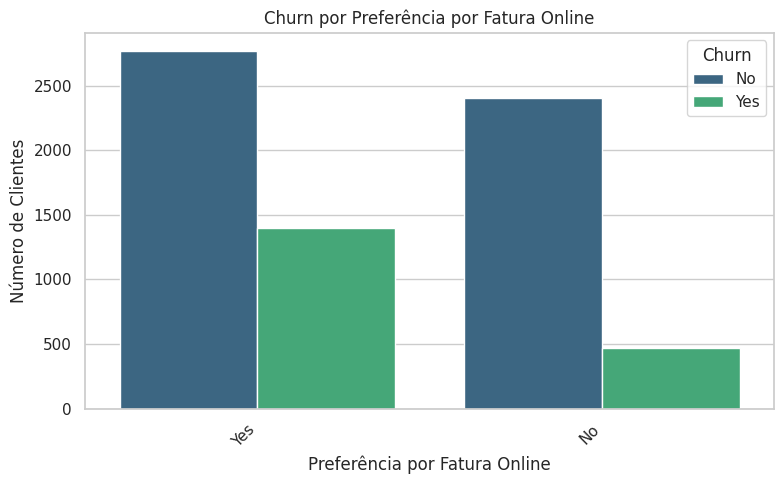


Análise para PaymentMethod:


,Yes
PaymentMethod,
Electronic check,45.29
Mailed check,19.11
Bank transfer (automatic),16.71
Credit card (automatic),15.24


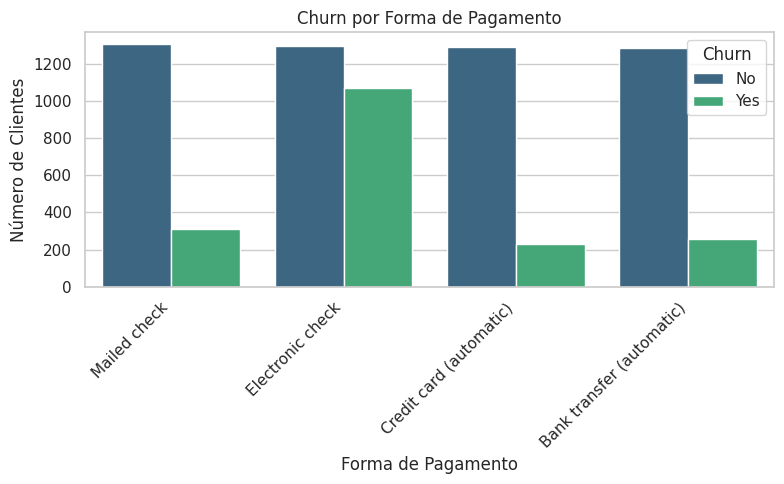


Distribuição e Gráficos de Variáveis Numéricas por Churn:

Análise para Meses de Adesão:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.57,24.11,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.98,19.53,1.0,2.0,10.0,29.0,72.0


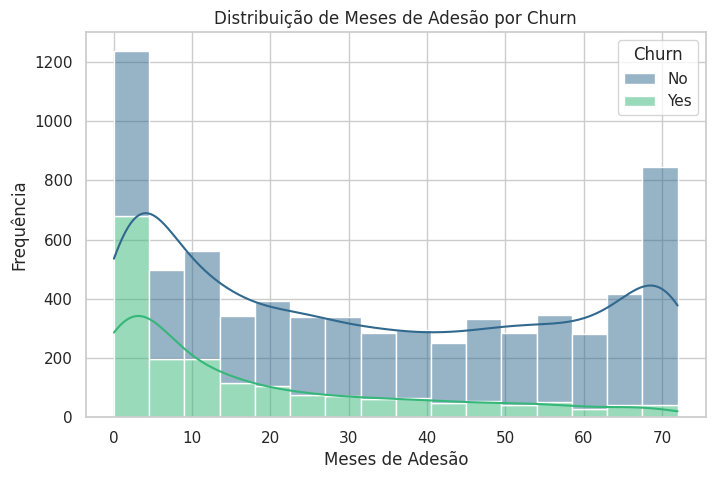


Análise para Gastos do Cliente por Mês:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.27,31.09,18.25,25.10,64.43,88.4,118.75
Yes,1869.0,74.44,24.67,18.85,56.15,79.65,94.2,118.35


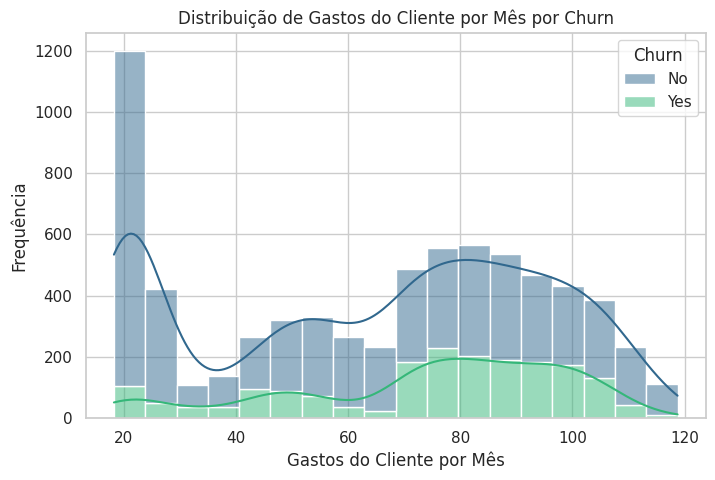

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração geral para gráficos
sns.set(style="whitegrid")

print("--- Análise Básica de Churn ---")

# Calcular a taxa de churn geral
churn_rate_general = dados_padronizados['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
print(f"\nTaxa de churn geral: {churn_rate_general:.2f}%")

# Calcular a porcentagem de churn por variáveis categóricas
print("\nPorcentagem e Gráficos de Churn por Variáveis:")

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
categorical_labels = {'gender': 'Gênero',
                      'SeniorCitizen': 'Idoso(a)',
                      'Partner': 'Parceiro(a)',
                      'Dependents': 'Dependentes',
                      'PhoneService': 'Assinatura de Serviço Telefônico',
                      'MultipleLines': 'Assinatura de Mais de uma Linha de Telefone',
                      'InternetService': 'Assinatura de Serviço de Internet',
                      'OnlineSecurity': 'Assinatura de Segurança Online',
                      'OnlineBackup': 'Assinatura de Backup Online',
                      'DeviceProtection': 'Assinatura de Proteção no Dispositivo',
                      'TechSupport': 'Assinatura de Suporte Técnico',
                      'StreamingTV': 'Assinatura de TV a Cabo',
                      'StreamingMovies': 'Assinatura de Streaming de Filmes',
                      'Contract': 'Tipo de Contrato',
                      'PaperlessBilling': 'Preferência por Fatura Online',
                      'PaymentMethod': 'Forma de Pagamento'}

for col in categorical_cols:
    print(f"\nAnálise para {col}:")
    churn_by_variable = (dados_padronizados.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100).round(2)
    # Exibir apenas a porcentagem de 'Yes' churn
    if 'Yes' in churn_by_variable.columns:
        display(churn_by_variable['Yes'].sort_values(ascending=False))
    else:
        print(f"Nenhum churn 'Yes' registrado para {col}.")

    # Criar um gráfico de barras para churn por variável categórica
    plt.figure(figsize=(8, 5))
    sns.countplot(x = col, hue='Churn', data=dados_padronizados, palette='viridis')
    plt.title(f'Churn por {categorical_labels[col]}')
    plt.xlabel(categorical_labels[col])
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Para variáveis numéricas, podemos analisar a distribuição de churns positivos e negativos
numerical_cols = ['tenure', 'Charges.Monthly']
numerical_labels = {
    'tenure': 'Meses de Adesão',
    'Charges.Monthly': 'Gastos do Cliente por Mês'
}


print("\nDistribuição e Gráficos de Variáveis Numéricas por Churn:")


for col in numerical_cols:
    print(f"\nAnálise para " + numerical_labels[col] + ":")
    display(dados_padronizados.groupby('Churn')[col].describe().round(2))
    # Criar histogramas para churn por variável
    plt.figure(figsize=(8, 5))
    sns.histplot(data=dados_padronizados, x=col, hue='Churn', multiple='stack', kde=True, palette='viridis')
    plt.title(f'Distribuição de {numerical_labels[col]} por Churn')
    plt.xlabel(numerical_labels[col])
    plt.ylabel('Frequência')
    plt.show()

# Relatório Técnico de Análise de Churn de Clientes



##**Introdução:**
Este relatório técnico detalha uma análise abrangente dos dados de clientes da TelecomX com o objetivo primordial de entender e mitigar a evasão de clientes, conhecida como churn. A evasão de clientes representa um desafio significativo para empresas de telecomunicações, impactando diretamente a receita e o crescimento. Neste estudo, exploraremos o conjunto de dados fornecido para identificar padrões e fatores que contribuem para que os clientes decidam deixar a empresa. A análise será realizada através de uma abordagem descritiva, examinando a taxa de churn geral e investigando a sua relação com diversas características dos clientes, incluindo informações demográficas, serviços subscritos, tipo de contrato e forma de pagamento. Ao final, apresentaremos as principais descobertas e recomendações estratégicas para ajudar a TelecomX a reter seus clientes e melhorar a satisfação.

##**Principais Descobertas:**

1.  **Taxa de Churn Geral:** A taxa de evasão de clientes observada no conjunto de dados é de **26.54%**. Isso indica que aproximadamente um quarto dos clientes analisados deixaram a empresa.

2.  **Influência do Gênero:** A análise não indicou uma influência significativa do gênero (masculino ou feminino) na taxa de churn. A proporção de clientes que evadem é semelhante entre os dois grupos.

3.  **Serviços Adicionais e Churn:** Observou-se que a ausência de determinadas assinaturas de serviços adicionais está fortemente associada a uma maior taxa de churn. Clientes que **não possuem assinatura de segurança online (OnlineSecurity)**, **backup online (OnlineBackup)** e **suporte técnico (TechSupport)** tendem a apresentar uma propensão maior a deixar de ser clientes.

4.  **Forma de Pagamento:** A forma de pagamento também demonstrou ter influência na evasão. Clientes que utilizam o **pagamento via Electronic check** apresentaram uma taxa de churn consideravelmente mais alta em comparação com outras formas de pagamento.

5.  **Tipo de Contrato:** A análise do tipo de contrato (Month-to-month, One year, Two year) revelou que clientes com contratos de **Month-to-month** possuem uma taxa de churn significativamente maior do que aqueles com contratos de **One year** ou **Two year**.

##**Recomendações:**

Com base nas descobertas, as seguintes ações são recomendadas para reduzir a taxa de evasão de clientes:

*   **Incentivo à Adesão a Serviços Adicionais:** A empresa deve investir em promoções e campanhas para incentivar os clientes a assinarem os serviços de segurança online, backup online e suporte técnico. A maior adesão a esses serviços pode contribuir para a retenção de clientes.
*   **Análise da Forma de Pagamento Electronic Check:** É fundamental investigar as razões pelas quais os clientes que utilizam o Electronic check apresentam maior churn. Problemas no processo de pagamento, taxas ou outras questões podem estar contribuindo para isso. Melhorias ou alternativas para essa forma de pagamento podem ser consideradas.
*   **Promoção de Contratos de Longo Prazo:** Influenciar os clientes a optarem por contratos de pelo menos um ano pode ser uma estratégia eficaz para reduzir o churn, dada a menor taxa de evasão observada em contratos de maior duração.

##**Conclusão:**

A análise descritiva dos dados aponta que a evasão de clientes na TelecomX está relacionada a fatores como a ausência de serviços adicionais chave (segurança online, backup e suporte técnico), a forma de pagamento (Electronic check) e o tipo de contrato (Month-to-month). Ao focar em estratégias para aumentar a adesão a serviços de valor agregado, otimizar o processo de pagamento eletrônico e incentivar contratos de longo prazo, a empresa tem potencial para reduzir significativamente sua taxa de churn.